In [236]:
! pip install mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_finance import candlestick_ohlc
from sklearn import preprocessing  
import plotly.graph_objects as go


from sklearn.model_selection import train_test_split


In [80]:
df_car_data=pd.read_csv('/content/gold.csv')

In [81]:
df_car_data.head(2)

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,289.5,289.5,280.0,283.7,21621,USD
1,2000-01-05,283.7,285.0,281.0,282.1,25448,USD


In [82]:
df_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5691 entries, 0 to 5690
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5691 non-null   object 
 1   Open      5691 non-null   float64
 2   High      5691 non-null   float64
 3   Low       5691 non-null   float64
 4   Close     5691 non-null   float64
 5   Volume    5691 non-null   int64  
 6   Currency  5691 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 311.4+ KB


In [85]:
df_car_data['Date']=pd.to_datetime(df_car_data['Date'])

In [86]:
df_car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5691 entries, 0 to 5690
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5691 non-null   datetime64[ns]
 1   Open      5691 non-null   float64       
 2   High      5691 non-null   float64       
 3   Low       5691 non-null   float64       
 4   Close     5691 non-null   float64       
 5   Volume    5691 non-null   int64         
 6   Currency  5691 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 311.4+ KB


In [87]:
df_car_data['Average_Price']=(df_car_data['High']+df_car_data['Low']+df_car_data['Open'])/3

In [88]:
df_car_data

,Date,Open,High,Low,Close,Volume,Currency,Average_Price
0,2000-01-04,289.50,289.5,280.0,283.70,21621,USD,286.333333
1,2000-01-05,283.70,285.0,281.0,282.10,25448,USD,283.233333
2,2000-01-06,281.60,282.8,280.2,282.40,19055,USD,281.533333
3,2000-01-07,282.50,284.5,282.0,282.90,11266,USD,283.000000
4,2000-01-10,282.40,283.9,281.8,282.70,30603,USD,282.700000
...,...,...,...,...,...,...,...,...
5686,2022-08-11,1807.90,1814.9,1798.6,1807.20,121259,USD,1807.133333
5687,2022-08-12,1805.20,1819.1,1799.6,1815.50,118649,USD,1807.966667
5688,2022-08-15,1818.90,1818.9,1787.6,1798.10,137765,USD,1808.466667
5689,2022-08-16,1795.50,1798.0,1785.4,1789.70,94403,USD,1792.966667


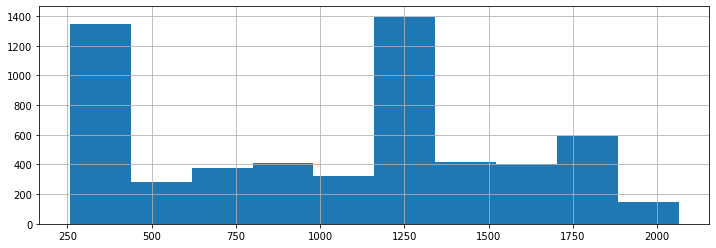

In [131]:
# Histogram
plt.figure(figsize=(12,4))
df_car_data['Average_Price'].hist()

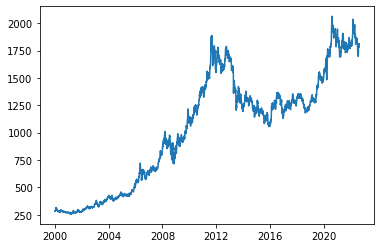

In [99]:
plt.plot(df_car_data['Date'],df_car_data['Average_Price'])

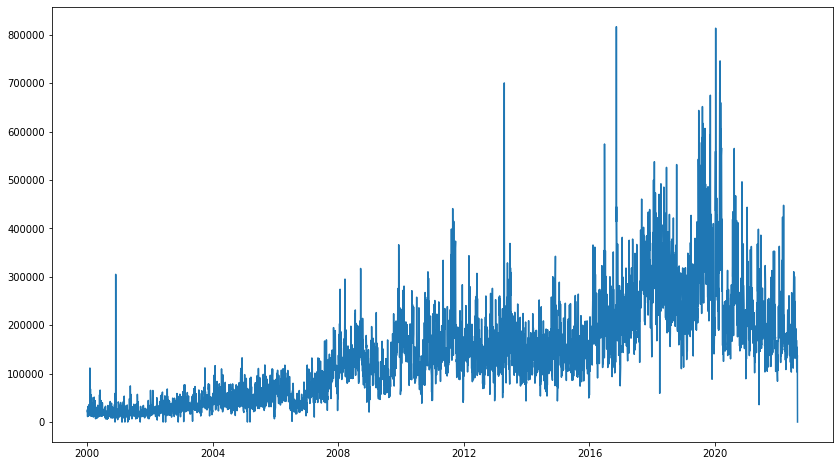

In [110]:
plt.figure(figsize=(14,8))
plt.plot(df_car_data['Date'],df_car_data['Volume'])

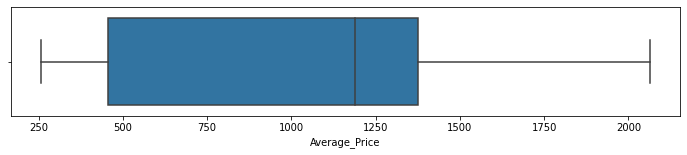

In [140]:
fig = plt.subplots(figsize = (12, 2))
ax = sns.boxplot(x = df_car_data['Average_Price'])


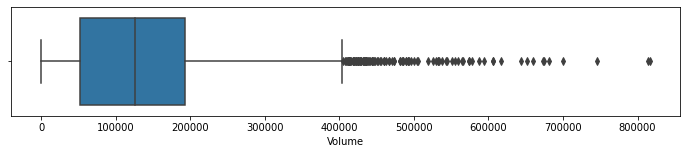

In [141]:
fig = plt.subplots(figsize = (12, 2))
ax = sns.boxplot(x = df_car_data['Volume'])

**Exponentially Weighted Moving Average is recent timeseries data which gives higher weightage in the calculation of average**

In [232]:
#Calculating EWMA on the open prices; for 200 days
df_car_data["ewm200"]=df_car_data.Open.ewm(span=200,min_periods = 0,adjust = False,ignore_na = False).mean()

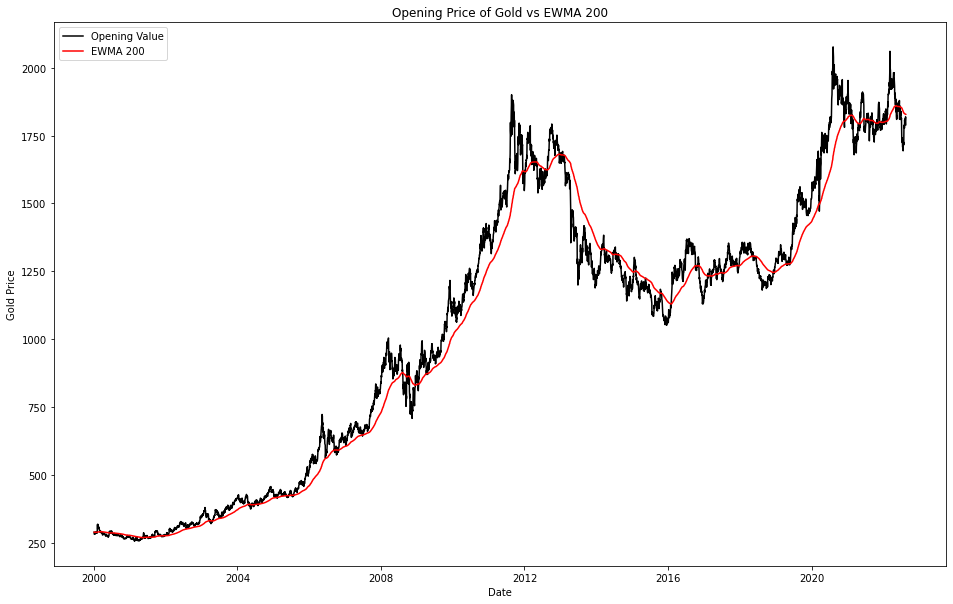

In [233]:
plt.figure(figsize = (16,10))
plt.plot(df_car_data.Date, df_car_data.Open, color = "black", label = "Opening Value")
plt.plot(df_car_data.Date, df_car_data.ewm200, color = "red", label = "EWMA 200")
plt.title("Opening Price of Gold vs EWMA 200")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.show()

In [262]:
df_car_data2=df_car_data.copy()

In [263]:
df_car_data2.set_index('Date',inplace=True)

In [264]:
data = df_car_data2[df_car_data2.index > '2021']

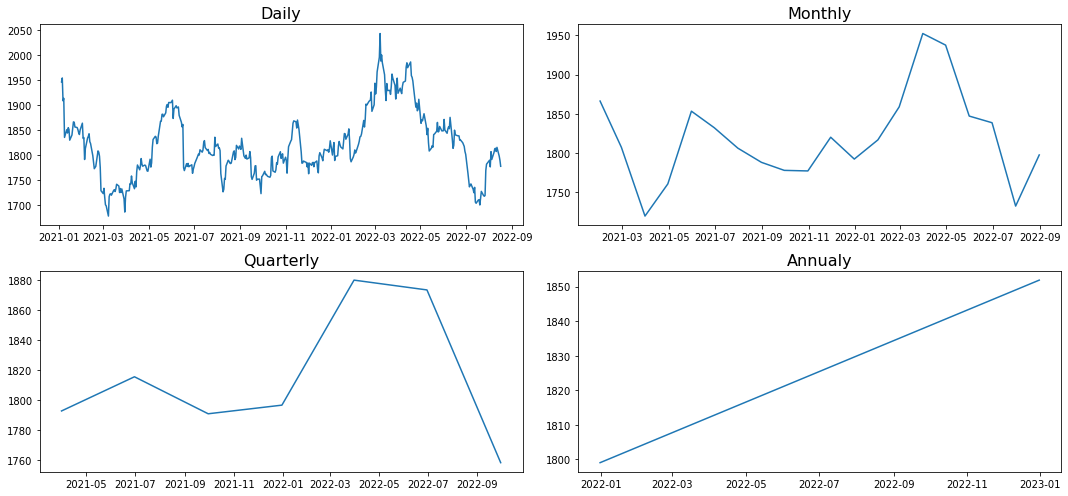

In [265]:
fig,axes = plt.subplots(2,2,figsize=[15,7])

## resampling to daily freq (original data)
axes[0,0].plot(data.Close)
axes[0,0].set_title("Daily",size=16)

## resampling to monthly freq 
axes[0,1].plot(data.Close.resample('M').mean())
axes[0,1].set_title("Monthly",size=16)

## resmapling to quarterly freq 
axes[1,0].plot(data.Close.resample('Q').mean())
axes[1,0].set_title('Quarterly',size=16)

## resampling to annualy freq
axes[1,1].plot(data.Close.resample('A').mean())
axes[1,1].set_title('Annualy',size=16)

plt.tight_layout()
plt.show()

Pre-Processing Dataset

In [210]:
df_car_data['year'] = df_car_data['Date'].dt.year

In [289]:
data = df_car_data[['Date','year','Volume','Average_Price']]
data = pd.DataFrame(data)
data.set_index('Date',drop = False, inplace = True)


In [290]:
data

,Date,year,Volume,Average_Price
Date,,,,
2000-01-04,2000-01-04,2000,21621,286.333333
2000-01-05,2000-01-05,2000,25448,283.233333
2000-01-06,2000-01-06,2000,19055,281.533333
2000-01-07,2000-01-07,2000,11266,283.000000
2000-01-10,2000-01-10,2000,30603,282.700000
...,...,...,...,...
2022-08-11,2022-08-11,2022,121259,1807.133333
2022-08-12,2022-08-12,2022,118649,1807.966667
2022-08-15,2022-08-15,2022,137765,1808.466667


In [291]:
print(data.shape)


(5691, 4)


In [292]:
data.head()

,Date,year,Volume,Average_Price
Date,,,,
2000-01-04,2000-01-04,2000,21621,286.333333
2000-01-05,2000-01-05,2000,25448,283.233333
2000-01-06,2000-01-06,2000,19055,281.533333
2000-01-07,2000-01-07,2000,11266,283.000000
2000-01-10,2000-01-10,2000,30603,282.700000


In [293]:
data.columns

Index(['Date', 'year', 'Volume', 'Average_Price'], dtype='object')

In [294]:
X=data.iloc[:,1:3]
y=data['Average_Price']

In [296]:
# Train & Test split
x_train, x_test, y_train, y_test = train_test_split( X,y,test_size=0.20,random_state=21)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(4552, 2)
Shape of Test Xs:(1139, 2)
Shape of Training y:(4552,)
Shape of Test y:(1139,)


In [297]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred= lr.predict(x_test)
print("Accuracy on Traing set: ",lr.score(x_train,y_train))
print("Accuracy on Testing set: ",lr.score(x_test,y_test))

Accuracy on Traing set:  0.8111942855151312
Accuracy on Testing set:  0.8133512219337515


In [298]:
df_prediction = pd.DataFrame({"Actual Selling Price":y_test,"Predicted_Price":y_pred})

In [299]:
df_prediction.head(n=10)

,Actual Selling Price,Predicted_Price
Date,,
2002-08-07,310.666667,406.666097
2012-01-11,1637.066667,1121.118360
2003-11-21,395.000000,479.005645
2016-04-12,1259.166667,1406.001716
2021-10-07,1761.166667,1761.372582
2009-04-29,895.433333,905.651540
2019-07-17,1412.533333,1624.922254
2004-04-06,417.933333,548.944538
2022-04-08,1938.966667,1832.398932


In [300]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"Intercept of Liner Regression {lr.intercept_}")
# The coefficients
print(f"slop of the input feature : {lr.coef_}")
# The mean squared error
print("Mean squared error:%.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Intercept of Liner Regression -142003.85555257063
slop of the input feature : [7.11336994e+01 2.74693299e-05]
Mean squared error:51037.34
Variance score: 0.81


Observation : Slop is +ve , so Price will increase.

In [301]:
data.head(2)

,Date,year,Volume,Average_Price
Date,,,,
2000-01-04,2000-01-04,2000,21621,286.333333
2000-01-05,2000-01-05,2000,25448,283.233333


In [302]:
data_new={'year':2022,'Volume':50448}          
index=[1]#serial number
my_data=pd.DataFrame(data_new,index)

In [303]:
print(my_data)

   year  Volume
1  2022   50448


In [304]:
#Pricing allocated
# Here the linearmodel is the variable  used in 2
my_data_price=lr.predict(my_data)
rounded_price = np.round(my_data_price, 2)
print(f" The predicted price for the given data is :{rounded_price}")

 The predicted price for the given data is :[1829.87]


Price forecasting

In [305]:
#Function to prepare training, testing and forecasting data
#Function arguments are dataframe, column to be forecasted, no. of days to be predicted in future,test data size
def prepare_data(data,forecast_col,forecast_out,test_size):
    label = data[forecast_col].shift(-forecast_out) #creating the label column and 
    #expanding the dataset by a given number of rows having value NaN(not a number)
    #print(f"Length of the Label is /n {label[15:]}")
    print(label[-15:])
    A = np.array(data[[forecast_col]]) #creating the feature array
    A = preprocessing.scale(A) #preprocessing the feature array to reduce the biasness among input features
    A_lately = A[-forecast_out:] #dropping the last n rows which are newly created for forecasting
    # and X_lately column will be used later in predicting method
    A = A[:-forecast_out] #training and test data
    label.dropna(inplace = True) #dropping the NA values
    y = np.array(label) #assigning the output y
    
    #Creating training and test data
    x_train = A[0:int(len(A)*(1-test_size))]
    x_test = A[-int(len(A)*test_size):]
    y_train = y[0:int(len(y)*(1-test_size))]
    y_test = y[-int(len(y)*test_size):]
    response = [x_train,x_test,y_train,y_test,A_lately]
    #list of lists : list comprising of training i/p, test set, training o/p, test o/p, final 10 days that we need to predict as forecasting values
    return response

In [306]:
forecast_col = 'Average_Price' #column to be forecasted
forecast_out = 10 # how far to forecast i.e forecasting for 10 days
test_size = 0.2 # size of test data

x_train,x_test,y_train,y_test,A_lately = prepare_data(data,forecast_col,forecast_out,test_size)

Date
2022-07-28    1807.133333
2022-07-29    1807.966667
2022-08-01    1808.466667
2022-08-02    1792.966667
2022-08-03    1786.850000
2022-08-04            NaN
2022-08-05            NaN
2022-08-08            NaN
2022-08-09            NaN
2022-08-10            NaN
2022-08-11            NaN
2022-08-12            NaN
2022-08-15            NaN
2022-08-16            NaN
2022-08-17            NaN
Name: Average_Price, dtype: float64


In [307]:
def train_model(model_class,x_train,y_train,x_test,y_test,A_lately):
    learner = model_class #Algorithm we want to initialise
    learner.fit(x_train,y_train) #learning happens here when the model is trained (training input and output variables)
    #y = f(x), function in the LR equation is given by learner.fit(x_train,y_train)
    score = learner.score(x_test,y_test) #testing the model
    
    #Prediction: We'll predict for a given set of dates
    #Forecast: We'll forecast for dates which are in Future
    
    forecast = learner.predict(A_lately) #set that'll contain forcasted data
    
    response = {} #creating json object/dictionary
    response['test_score'] = score #first key is test_score
    #measures the squared error b/w actual value and predicted value and provides a score b/w 0 and 1
    response['forecast_set'] = forecast #passing the forecasted values
    print(response)
    
    return learner

In [308]:
learner = train_model(model_class = LinearRegression(),x_train = x_train,y_train = y_train
                      ,x_test = x_test,y_test = y_test,A_lately = A_lately)

{'test_score': 0.967902151481235, 'forecast_set': array([1790.12608294, 1798.76026634, 1793.48013111, 1806.19894742,
       1812.01041701, 1806.03290543, 1806.86311537, 1807.36124133,
       1791.91933642, 1785.82559544])}


In [309]:
data.columns

Index(['Date', 'year', 'Volume', 'Average_Price'], dtype='object')

In [311]:
fig = go.Figure()
#add_trace: plotting line graph 
#Scatter: plots points b/w 2 points where y is in date format
#plotting training data represented by teal
fig.add_trace(go.Scatter(x = data["Date"], y = data["Average_Price"],
                        mode = 'lines',
                        name = 'Price', line = dict(color='teal')))
#plotting prediction of date represented by blue
#green colored is actual value and blue color is predicted value
fig.add_trace(go.Scatter(x = data["Date"][-len(x_test):], y = learner.predict(x_test),
                        mode = 'lines',
                        name = 'Predicted Price', line = dict(color='blue')))
#plotting forecast data represented by red (future forecast of 10 days)
fig.add_trace(go.Scatter(x = pd.date_range('2022-08-15','2022-08-24',
                                           freq = pd.tseries.offsets.BDay()),
                        y = learner.predict(A_lately),
                        mode = 'lines',
                        name = 'Forecasted Price', line = dict(color='yellow')))
#DateOffset: Standard kind of date increment used for a date range
#BDay: DateOffset subclass representing possibly n business days

fig.update_layout(title = 'Gold Price Prediction & Forecasting over 10 days',
                 plot_bgcolor = 'black',
                 xaxis = dict(showgrid = False), yaxis = dict(showgrid = False),
                 xaxis_title = "Date",
                 yaxis_title = "Gold Prices (USD)")

fig.show()